**DATA SCIENCE AND BUSINESS ANALYTICS INTERSHIP AT THE SPARKS FOUNDATION**

**ANDHE SREE HARSHITHA**

**TASK 3- PERFORMING EXPLORATORY DATA ANALYSIS ON DATASET "SAMPLESUPERSTORE**

In this task we will find the work areas where we need to work more on making more profit

Step-1 : Importing Libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [13]:
from google.colab import files
uploaded = files.upload()

Saving SampleSuperstore.csv to SampleSuperstore.csv


Step-2 : Reading Datasets

In [14]:
import pandas as pd
df=pd.read_csv("SampleSuperstore.csv")

In [15]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


Step-3 : Data Preprocessing

In [16]:
df.shape

(9994, 13)

In [17]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [18]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [20]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [21]:
df.duplicated().sum()

17

In [22]:
df.drop_duplicates()
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [23]:
df = df.drop(['Postal Code'],axis=1)
#droping of unnecessary columns like Postal Code

Step-4 : Exploratory data analysis

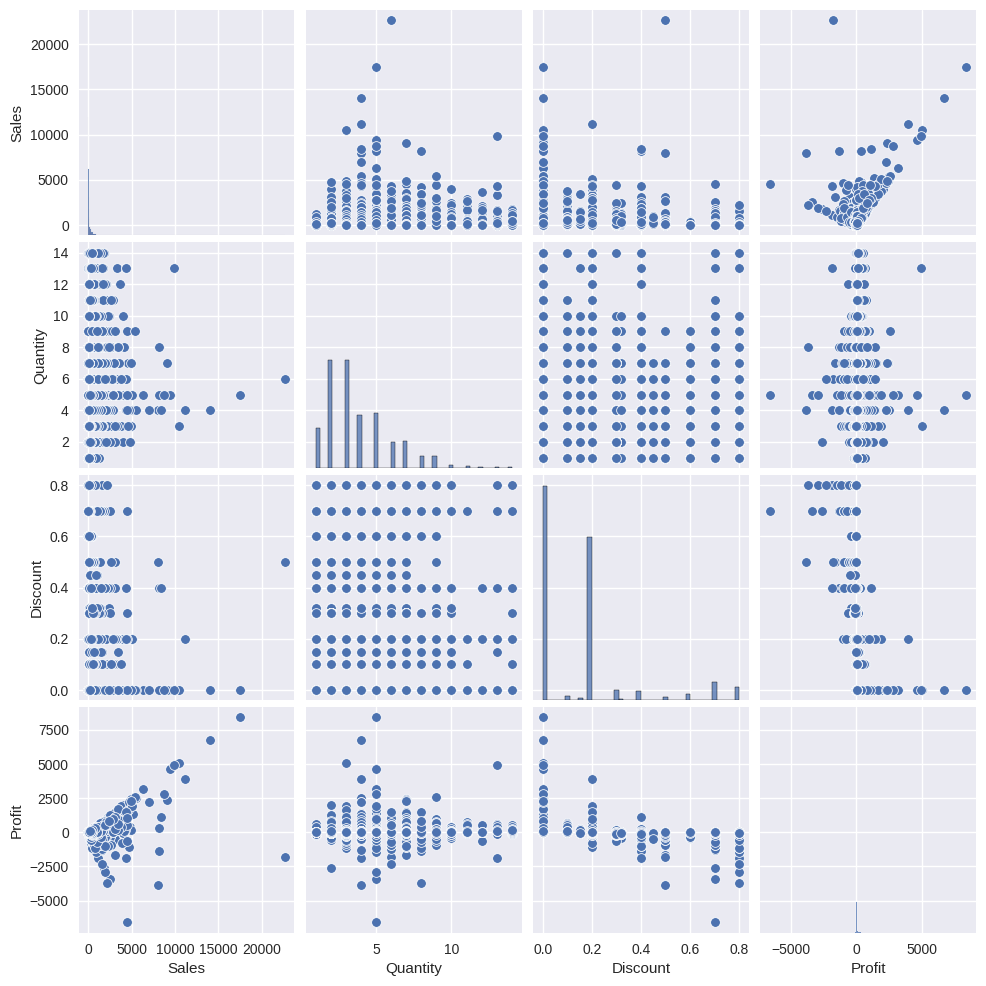

In [24]:
#visualizing the dataset as a whole ushing the pair plot
import seaborn as sns
sns.pairplot(df)

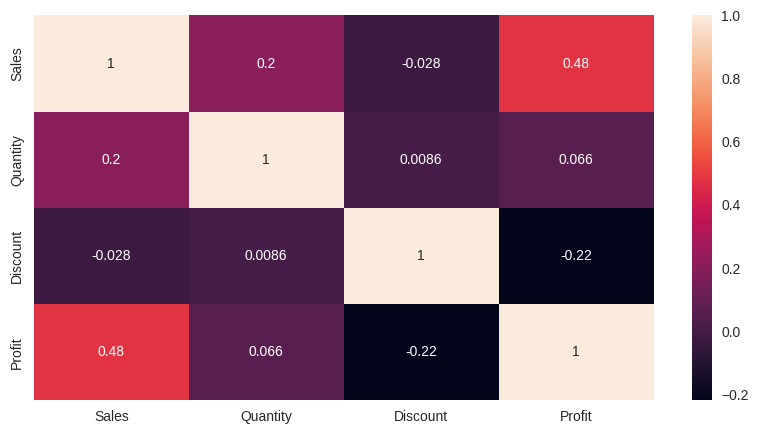

In [26]:
#finding the pairwise coorelation between the columns and visualising using heatmaps
df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True)
plt.show()

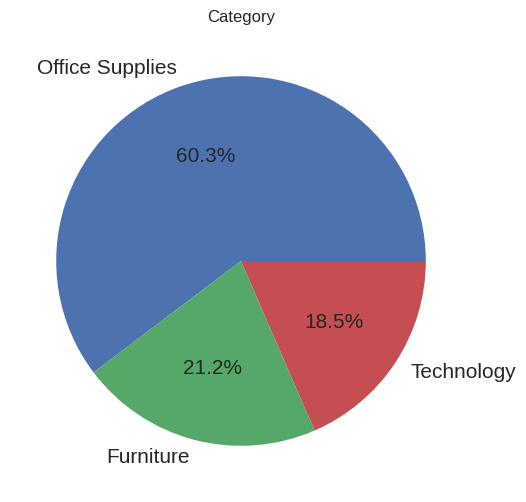

In [27]:
plt.figure(figsize=(6,6))
textprops = {"fontsize":15}
plt.title('Category')
plt.pie(df['Category'].value_counts(), labels=df['Category'].value_counts().index, autopct='%1.1f%%',textprops = textprops)
plt.show()

<Figure size 1000x1600 with 0 Axes>

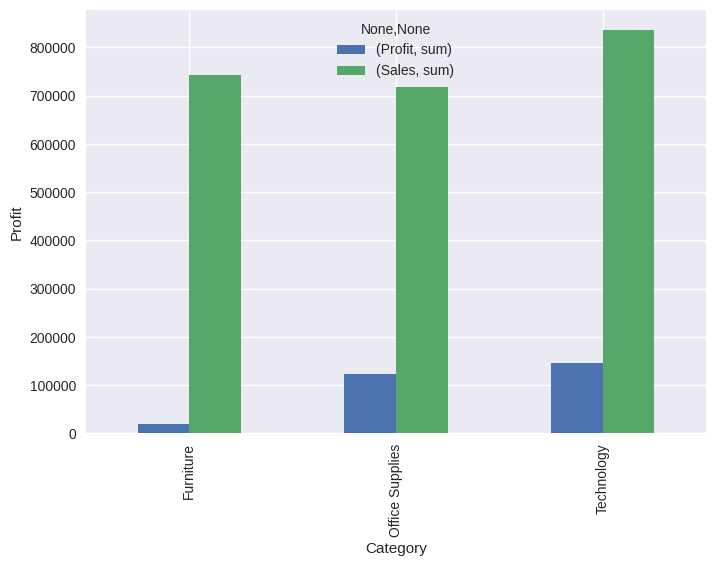

In [28]:
plt.figure(figsize=(10,16))
df.groupby('Category')['Profit','Sales'].agg(['sum']).plot.bar()
plt.ylabel('Profit')
plt.show()

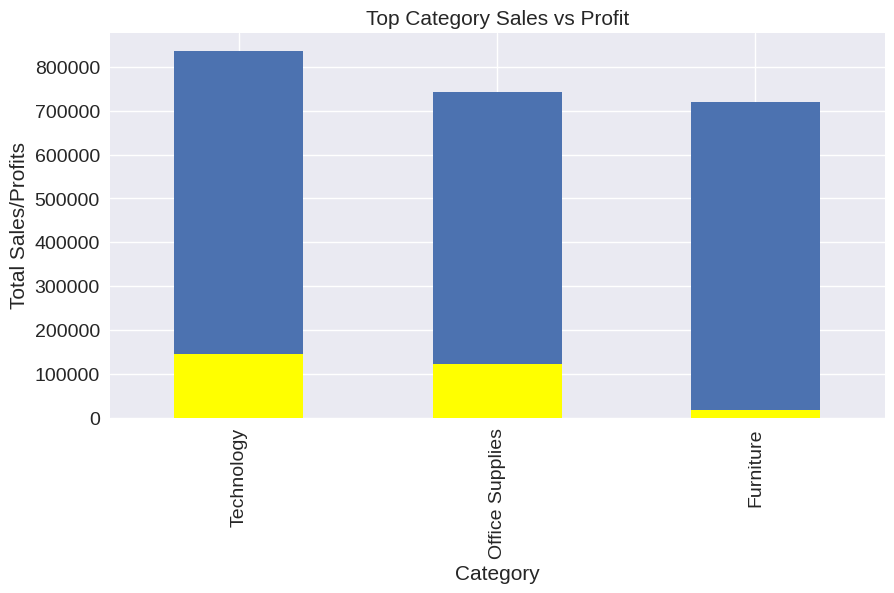

In [29]:
#computing top categories in terms of sales from first 100 obsevations
top_category_s = df.groupby("Category").Sales.sum().nlargest(n = 100)
top_category_p = df.groupby("Category").Profit.sum().nlargest(n=100)

#plotting to see it visually
plt.style.use('seaborn')
top_category_s.plot(kind ='bar',figsize=(10,5),fontsize=14)
top_category_p.plot(kind ='bar',figsize=(10,5),fontsize=14, color='yellow')
plt.xlabel('Category',fontsize =15)
plt.ylabel('Total Sales/Profits', fontsize=15)
plt.title("Top Category Sales vs Profit",fontsize=15)
plt.show()


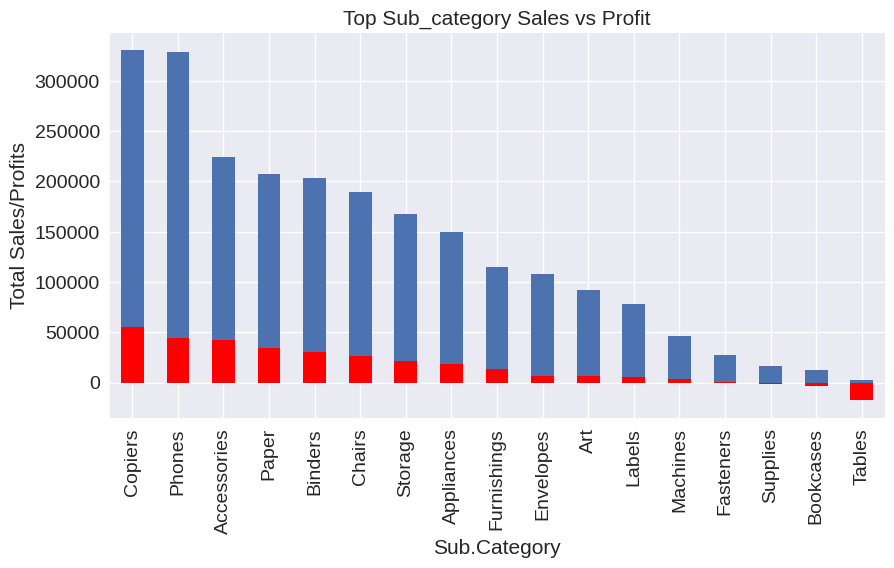

In [31]:
#computing top sub-categories in terms of sales from first 100 observations
top_subcategory_s = df.groupby("Sub-Category").Sales.sum().nlargest(n = 100)
top_subcategory_p = df.groupby("Sub-Category").Profit.sum().nlargest(n=100)

#plotting to see it visually
plt.style.use('seaborn')
top_subcategory_s.plot(kind = 'bar', figsize = (10,5), fontsize = 14)
top_subcategory_p.plot(kind ='bar', figsize=(10,5),fontsize=14,color='red')
plt.xlabel('Sub.Category',fontsize=15)
plt.ylabel('Total Sales/Profits',fontsize=15)
plt.title("Top Sub_category Sales vs Profit",fontsize=15)
plt.show()


Visualing the discount

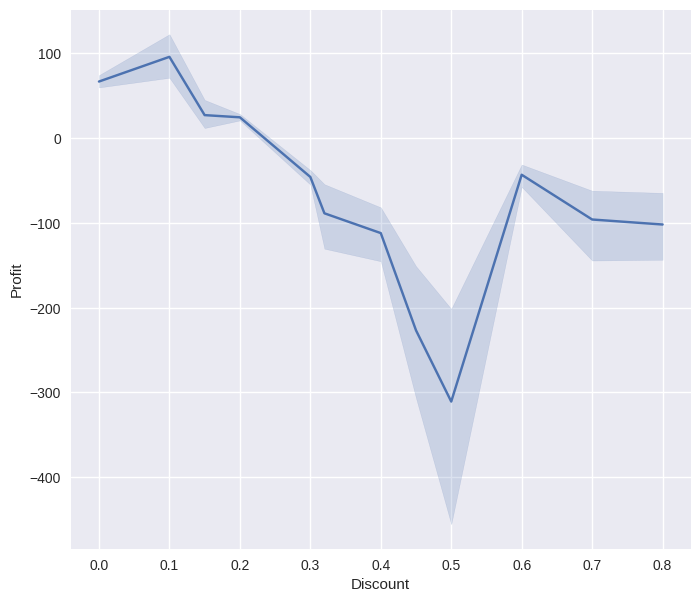

In [32]:
plt.figure(figsize=(8,7))
sns.lineplot(x=df['Discount'], y=df['Profit'])
plt.show()

Visualing the Sales Vs Profits in different regions

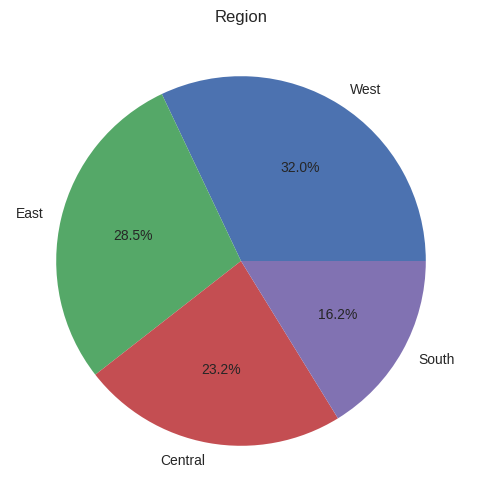

In [33]:
plt.figure(figsize=(6,6))
plt.title('Region')
plt.pie(df['Region'].value_counts(), labels=df['Region'].value_counts().index,autopct='%1.1f%%')
plt.show()

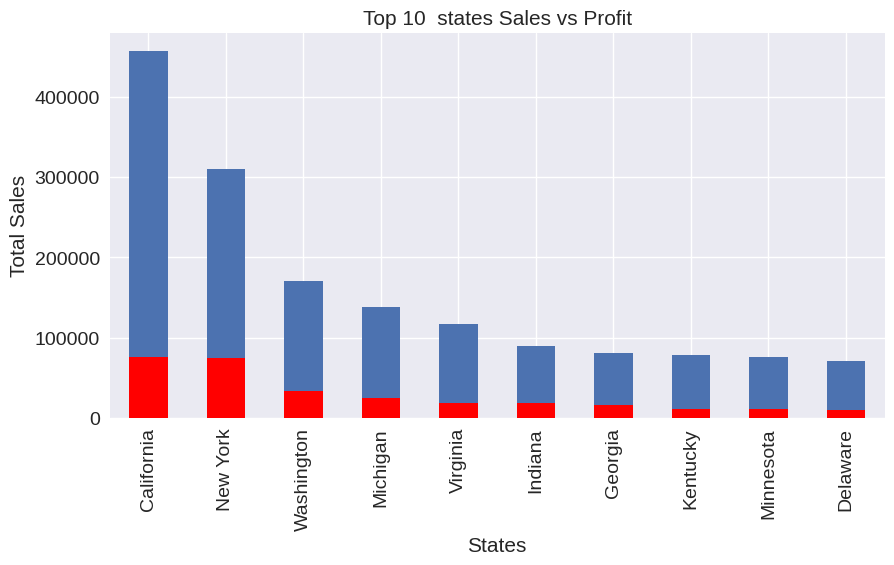

In [34]:
#computing top states in terms of sales from first 10 observations.
top_states_s = df.groupby("State").Sales.sum().nlargest(n= 10)
#computing top states in terms of profit from first 10 observstions.
top_states_p = df.groupby("State").Profit.sum().nlargest(n=10)

plt.style.use('seaborn')
top_states_s.plot(kind = 'bar', figsize = (10,5), fontsize = 14)
top_states_p.plot(kind ='bar', figsize=(10,5),fontsize=14,color='red')
plt.xlabel('States',fontsize=15)
plt.ylabel('Total Sales',fontsize=15)
plt.title("Top 10  states Sales vs Profit",fontsize=15)
plt.show()

Checking the interdependency os Sales,Profit and Discount.

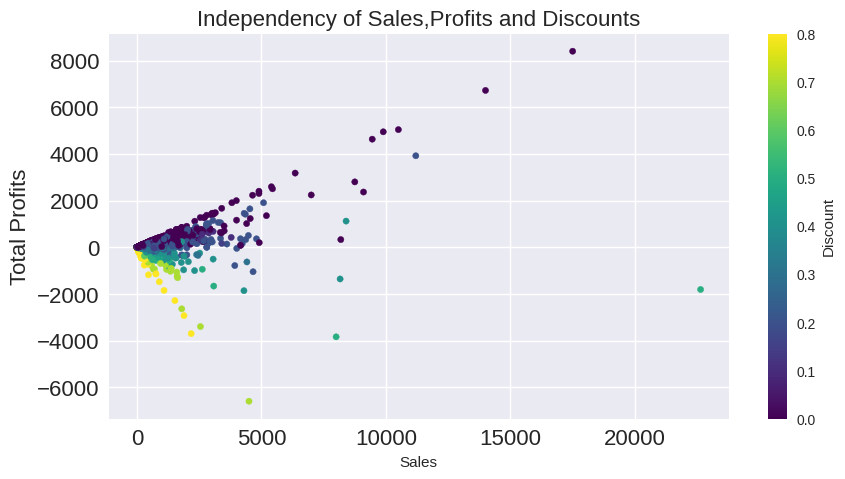

In [35]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')
df.plot(kind='scatter',figsize=(10,5), x = "Sales", y ="Profit",c ="Discount",s = 20,fontsize = 16,colormap = "viridis")
plt.ylabel('Total Profits',fontsize=16)
plt.title('Independency of Sales,Profits and Discounts',fontsize=16)

plt.show()

This graph clearly shows that if we give more Discount on our products sales increases but profit decreases.